# Let's learn some ML

<img    src="./oprah.gif"    >

##    What    is    unsupervised    learning (USML)

In order to answer that we need to know what is supervised learning and how it works.  
**Supervised learning (SL)** : Given a dataset with target labels, we have to infer a function to map new data with labels. Example: Fruit Basket

Now that we know how to define supervised learning,lets understand *unsupervised learning*.  
- Data does not have target labels in entire unsupervised learning process.  
- Our goal cannot be to infer a map function as we do not deal with labels.

What is the **GOAL** then?  
* The goal of USML is to model the behaviour or/and structure of data in order to learn more about it.

The best and the worst thing about USML problems are that they do not have a correct solution. It's totally up to us what we infer from the data, whether we find groups among it or we find relationships etc.

Typically, USML problems are of 2 types.
1. **Clustering**- i.e nothing but forming groups within the data.  
    *K-means* in one the popular methods used for clustering.
2. **Association**- i.e find relationships, associations among data.  
    *Apriori Algo* is one of the popular methods for Association rule mining.

Both of these categories have multiple and even more sophisticated algorithms like [density based clustering](http://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html), [frequent pattern growth](https://en.wikibooks.org/wiki/Data_Mining_Algorithms_In_R/Frequent_Pattern_Mining/The_FP-Growth_Algorithm) in association rule mining.
If interested you can read more about them with associated links.


K- means is explained in the picture below.  
Apriori Algo is very straightforward. If any one wants to check it out here is the [link](https://en.wikipedia.org/wiki/Apriori_algorithm)

## K- means Expained in a Picture


<img    src="./kmeans.gif"    width="400"    height="400">

As I said, we will focus more towards the applications rather theory in this section.

##    Not    So    fancy    but    effective    ML    applications
***

When we hear ML applications, what generally comes to out mind.
- Classification like hand digit recognition
- Regression examples like prediction house prices.
- Or some fancy speech recognition, video surveillance 

All above applications are known more to people as they got the communities attention through demos, open access, presentations et.

Today, we will discuss some not so fancy but effective ML applications.
I will start with clustering.

## Clustering Applications

#### 1. Clustering Algorithm in Search Engines:

Clustering algorithm is the backbone behind the search engines. Search engines try to group similar objects in one cluster and the dissimilar objects far from each other. It provides result for the searched data according to the nearest similar object which are clustered around the data to be searched. Better the clustering algorithm used, better are the chances of getting the required result on the front page.

#### 2. Clustering in finance.

- *Portfolio Management*: Imagine you are a portfolio manager and you have a business product which helps your clients invest in mutual funds based on their risk appetite. How do you build this product?

Fortunately, we know what is USML.We also know clustering.

So, if I define a task as grouping mutual funds on the basis of different risk factors. This task is nothing but clustering.

**TA-DA!!**  
We just made a business product with what we learned so far.

- Another applcation in finace could be grouping credit card holders based on thier transactions to suggest similar purchases/products availed by people in same group.

#### 3. Image Segmentation.

- *Image segmentation*
Image segmentation is defined as process of partitioning the digital image into multiple segments so that it becomes easier to analyze and process. It can be used for removing background from the foreground. This background removal technique is heavily used in video surveillance.

<img    src="./background removal.png"  >


Now to perform image segmentation we can use clustering.Nowadays, there are more sophisticated algorithms out there. 
For the purpose of demonstration we will use clustering to perform image segmentation.

I request everybody to not get intimated by the code below. Just try to see the overall picture. Code is taken from [Github](https://github.com/suhas-nithyanand/Image-Segmentation-using-K-Means) under Apache open source license. 

In [137]:
from    IPython.display    import    HTML
from IPython.display import YouTubeVideo
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
%matplotlib    inline

background pixel level 0


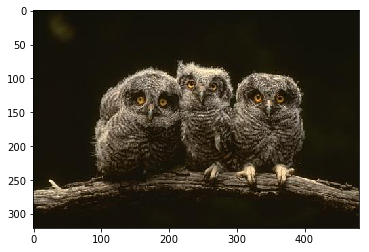


iteration 0


KeyboardInterrupt: 

In [140]:
import math 
from PIL import Image
from pylab import *
import matplotlib.cm as cm
import scipy as sp
import random
from collections import defaultdict
import operator

im = Image.open('input2.jpg')
plt.imshow(im, cmap="Greys_r")
arr = np.asarray(im)

out = Image.open('out2.jpg').convert('L')
arr_out = np.asarray(out)

rows,columns = np.shape(arr_out)
print('background pixel level',arr_out[0][0])

#print '\nrows',rows,'columns',columns
ground_out = np.zeros((rows,columns))


''' Converting ground truth image into binary image for evaluation'''

for i in range(rows):
    for j in range(columns):
        if arr_out[i][j] > 120:
            ground_out[i][j] = 0

        else:
            ground_out[i][j] = 1

plt.figure()
# plt.imshow(ground_out, cmap="Greys_r")
plt.show()


shape = np.shape(arr)

rows = shape[0]
columns = shape[1]

'''obtaining 6 random centroid points'''

r_points = [ random.randint(0, 255) for i in range(6) ]
g_points = [ random.randint(0, 255) for i in range(6) ]
b_points = [ random.randint(0, 255) for i in range(6) ]

grey_l = defaultdict(list)

''' Grey scale levels corresponding to 6 clusters'''

grey1 = 40
grey2 = 80
grey3 = 120
grey4 = 160
grey5 = 200
grey6 = 240

grey_l[0] = 40
grey_l[1] = 80
grey_l[2] = 120
grey_l[3] = 160
grey_l[4] = 200
grey_l[5] = 240



g = defaultdict(list)

g2 = []
g3 = []
g4 = []
g5 = []
g6 = []

end = np.zeros((rows,columns))
zavg = [0,0,0]    

''' computing average centroids after every iteration'''

def find_centroids(g):
    red_cent_list = []
    blue_cent_list = []
    green_cent_list = []
    #print '0 shape',np.shape(g)
    for i in range(0,6):
        array = np.matrix(g[i])
        avg = np.mean(array,0)
        #print '\naverage values',avg
        pavg = np.ravel(avg)
        #print '2 shape', np.shape(pavg)
        #print 'pavg', pavg
        if not len(pavg):
            red_cent_list.append(zavg[0]) 
            blue_cent_list.append(zavg[1]) 
            green_cent_list.append(zavg[2])
        else:
            red_cent_list.append(pavg[0]) 
            blue_cent_list.append(pavg[1]) 
            green_cent_list.append(pavg[2])
    return[red_cent_list,blue_cent_list,green_cent_list] 
        
             
''' Computing 10 iterations to obtain converged centroids of six clusters'''    
    
for it in range(0,10):
    print('\niteration',it)
    g= defaultdict(list)
    for r in range(rows):
        for c in range(columns):
            img = arr[r][c]
            #print '\nimg', img
            red = img[0]
            green = img[1]
            blue =  img[2]
            #print '\n red',red,'blue',blue,'green',green

            distance_list = []
            for k in range(0,6):
                ''' computing absolute distance from each of the cluster and assigning it to a particular cluster based on distance'''
                #print '\n red ref point',r_points[k],'blue ref point ',b_points[k],'green ref point',g_points[k]
                distance = math.sqrt(((int(r_points[k])- red)**2)+((int(g_points[k]) - green)**2)+((int(b_points[k])-blue)**2))
                #print '\ndistance',distance
                distance_list.append(distance)
            #print '\ndistance list',distance_list        
            index, value = min(enumerate(distance_list), key=operator.itemgetter(1))
            end[r][c] = grey_l[index]
            #print '\nindex',index
            g[index].append([red,blue,green])
    centroids= find_centroids(g)
    #print 'centroids',centroids
    r_points = []
    b_points = []
    g_points = []
    r_points = centroids[0]
    b_points = centroids[1]
    g_points = centroids[2]
    #print '\nr points',r_points
    #print '\nb points',b_points
    #print '\ng points',g_points


''' From observation we know that ground truth image pixel[0,0] is part of background. This is used for evaluation'''

result = np.zeros((rows,columns))
ref_val = end[0][0]
#print '\nref_val',ref_val
for i in range(rows):
    for j in range(columns):
        if end[i][j] ==  ref_val:
            result[i][j] = 1

        else:
            result[i][j] = 0


''' ********************************** Calculation of Tpr, Fpr, F-Score ***************************************************'''


tp = 0
tn = 0
fn = 0
fp = 0

for i in range(rows):
    for j in range(columns):
        if ground_out[i][j] == 1 and result[i][j] == 1:
            tp = tp + 1
        if ground_out[i][j] == 0 and result[i][j] == 0:
            tn = tn + 1
        if ground_out[i][j] == 1 and result[i][j] == 0:
            fn = fn + 1
        if ground_out[i][j] == 0 and result[i][j] == 1:
            fp = fp + 1



print('\n************Calculation of Tpr, Fpr, F-Score********************')

#TP rate = TP/TP+FN
tpr= float(tp)/(tp+fn)
print ("\nTPR is:",tpr)

#fp rate is
fpr= float(fp)/(fp+tn)
print ("\nFPR is:",fpr)

#F-score as 2TP/(2TP + FP + FN)
fscore = float(2*tp)/((2*tp)+fp+fn)
print ("\nFscore:",fscore)


plt.figure()
plt.imshow(end)
plt.show()


'''displaying the clusters in different gray scale levels'''
plt.figure()
plt.imshow(result, cmap="Greys_r")
plt.colorbar()
plt.show()    

### What is an image for a computer ?
We all know that image is nothing but a matrix of pixels, any image transformation is actually a matrix transformation which are very slow on CPUs.  

We use GPUs to perform heavy image, video transformation.


<img    src="./ml-4.jpg" height="400px" width="400px" >

## Association Rule Mining examples
We have seen how useful clustering can be. 

Now we will shift towards association, the second category of USML .
Its by far most surprising category across ML.

By surprising I mean even the data scientist working on the problem can be blown away by the results.I will share two such examples.

We all have shopped at least once from retail giants like Walmart, Target, tesco, costco , Big-baazar etc.

Did you know that all these corporations store and analyze every single transaction/information from us. They have research centers across the globe for just this purpose. These research centers derive information from the vast amount of data and use it to make decisions for betterment and future of company. Below are two such incidents/examples of such research.

#### 1. Story of a Diaper

In order to lure and retain customers, once walmart decided to offer discounted bundled packages of products.

One such product was **diaper**. They wanted to know what to package with diaper so that their sales revenue increases.

They performed association mining and to their surprise it was BEER.

It was beer which was sold most with the diaper. Infact on further analysis they found that most of these transactions were made by Men from age between 25-32 on friday afternoons.



<img  src="./beer.jpg" height="200px" width="300px" >

Well if you think now, it kinda does make sense.
I share one more example which even surprised me for a moment.

#### 2. Story of a teen and Target

Target found out that many customers come to them to buy only few types of products like groceries, electronics, baby products etc. Rest they are buy from local nearby specific product selling stores.

So they wanted to become customer's one step solution to every need.

For example they wanted to sell baby products to new mothers. Groceries to families etc.It can be done by marketing, but they wanted to do marketing at a individual level. They approached there research center to solve this problem of customer identification.

Boy they did a hell of a job

<img  src="./target.jpg" height="200px" width="400px" >

This right here is the power of ML. It used a bit of both supervised and USML.



<img  src="./ml-3.jpeg" height="200px" width="400px" >

Nowadays, this sort of customer profiling/identification is also done by financial institutions to sell their clients personalized products.

In [114]:
im = Image.open('input1.jpg')
arr = np.asarray(im)

In [115]:
arr.shape

(321, 481)

In [116]:
%time U, S, Vh = linalg.svd(arr, full_matrices=False)

Wall time: 168 ms


In [117]:
print(U.shape, S.shape, Vh.shape)

(321, 321) (321,) (321, 481)


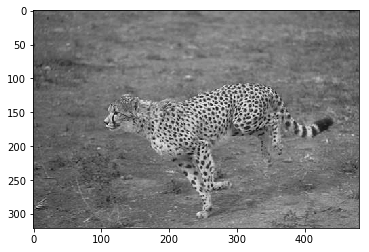

In [118]:
plt.imshow(np.matmul(np.matmul(U,np.diag(S)),Vh), cmap="Greys_r")

In [119]:
%time u, s, v = decomposition.randomized_svd(arr, 30)

Wall time: 107 ms


In [120]:
new_arr = np.matmul(np.matmul(u,np.diag(s)),v)

In [121]:
print(u.shape, s.shape, v.shape)

(321, 30) (30,) (30, 481)


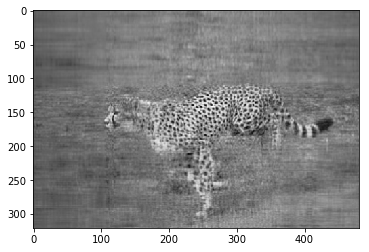

In [124]:
plt.imshow(new_arr, cmap="Greys_r")

https://www.youtube.com/watch?v=uQhTuRlWMxw

For rank of a matrix

## Video summarizes rachel's presentation. 

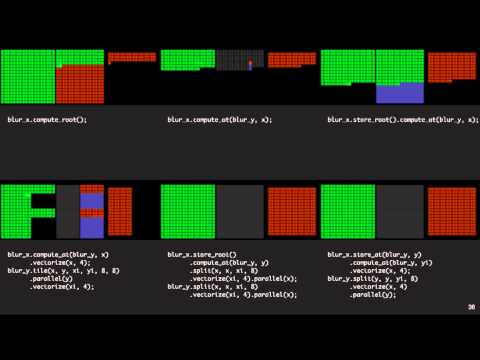

In [38]:

# HTML('<iframe    width="560"    height="315"    src="https://www.youtube.com/embed/DQWI1kvmwRg?rel=0&amp;controls=0&amp;showinfo=0"    frameborder="0"    allowfullscreen></iframe>')
YouTubeVideo('DQWI1kvmwRg')